## Домашняя работа 5

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [48]:
# Загружаем данные
data = pd.read_csv('data/non_linear.csv', sep=',')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x_train  50 non-null     float64
 1   y_train  50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes
None


,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [49]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
       Для каждой степени от 1 до  degree возводим x в эту степень"""
    return np.array([ source_data**n for n in range(1, degree + 1) ]).T

In [50]:
def train_polynomial(degree, data, draw=False):
    """Генерим данные, тренируем модель
    дополнительно рисуем график если draw=True"""
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

#     error = mean_squared_error(data['y_train'], y_pred)
    error = r2_score(data['y_train'], y_pred)
    
    if draw:
        
        plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
        plt.plot(data['x_train'], y_pred)
    return error

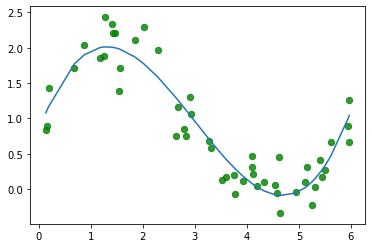

In [51]:
# Проверим работу функция с числом измерений 3
degree = 3
train_polynomial(degree, data, draw=True);

Испытание 1, score=0.519
Испытание 2, score=0.533
Испытание 3, score=0.888
Испытание 4, score=0.895
Испытание 5, score=0.896
Испытание 6, score=0.899
Испытание 7, score=0.9
Испытание 8, score=0.909
Испытание 9, score=0.909
Испытание 10, score=0.909
Лучшие результат дала модель с 10 измерениями, показатель ошибки 0.909


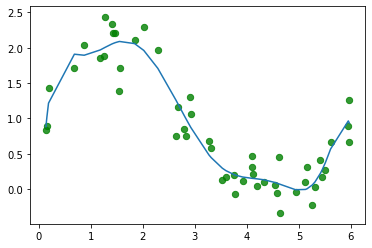

In [52]:
best_error = -10
best_degree = 0
for i in range(1, 10 + 1):
    error = train_polynomial(i, data, draw=False)
    print(f'Испытание {i}, score={round(error, 3)}')
    if error > best_error:
        best_error = error
        best_degree = i
print('Лучшие результат дала модель с', best_degree, 'измерениями, показатель ошибки', round(best_error, 3) )
train_polynomial(best_degree, data, draw=True);

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [53]:
from numpy.linalg import inv

class CustomLinearReg:
    def __init__(self):
        self.w = []
    
    def fit(self, X, y):
        # Добавляем 1 столбец
        features = np.append(np.ones(X.shape[0])[:,np.newaxis], X, axis=1)
        # Считаем по формуле
        self.w = inv( features.T.dot(features) ).dot(features.T).dot(y)
        return self
    
    def predict(self, X):
        # Добавляю единичный столбец
        features = np.append(np.ones(X.shape[0])[:,np.newaxis], X, axis=1)
        # Создаю массив с ответами, заполненный нулями
        p = np.zeros((features.shape[0]))
        # Само вычисление функции
        for i in range(features.shape[1]):
            p = p + features[:,i] * self.w[i]
        return p

In [54]:
def custom_train_polynomial(degree, data, draw=False):
    """Генерим данные, тренируем модель
    дополнительно рисуем график если draw=True"""
    X = generate_degrees(data['x_train'], degree)

    model = CustomLinearReg().fit(X, data['y_train'])
    y_pred = model.predict(X)

#     error = mean_squared_error(data['y_train'], y_pred)
    error = r2_score(data['y_train'], y_pred)
    
    if draw:
        
        plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
        plt.plot(data['x_train'], y_pred)
    return error

0.909110614620351

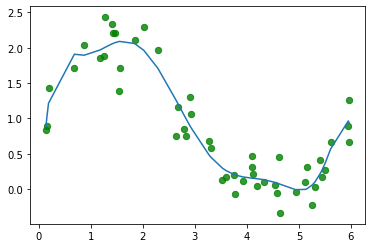

In [55]:
# Проверим работу функции, сравнив с предыдущим графиком
degree = 10
custom_train_polynomial(degree, data, draw=True)

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target

In [61]:
# print(boston_dataset.DESCR)

In [58]:
# Разделяем данные на train и validation часта
x_train, x_valid, y_train, y_valid = train_test_split(features, y, train_size=0.2)

In [59]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_valid)
print('r2_score =', r2_score(y_valid, y_pred))

r2_score = 0.6901821853173649


In [65]:
# Теперь попробуем применить z-преобразование, и снова посчитать скор
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
# print("z-transform датасет: %s" % x_train_scaled)

reg2 = LinearRegression().fit(x_train_scaled, y_train)
y_pred2 = reg2.predict(x_valid_scaled)

print('r2_score =', r2_score(y_valid, y_pred2))

r2_score = 0.6901821853173662


Вывод: в нашем случае применения StandartScaler повлияло на результат незначительо